In [7]:
import sys
sys.path.append("../")

from src.data_prep import load_data

df = load_data("../data/raw/StudentPerformanceFactors.csv")
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


Shape: (6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70



Missing values per column:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Dtypes:
 object    13
int64      7
Name: count, dtype: int64


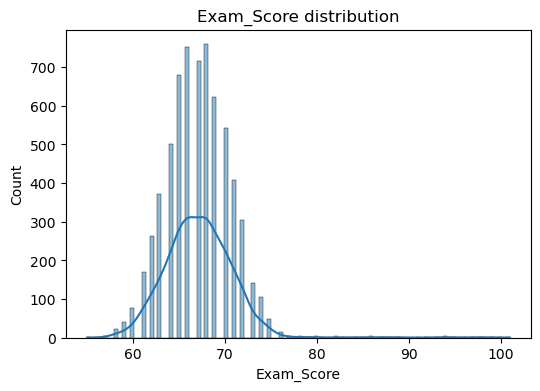

In [9]:
# Cell A — sanity checks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv("../data/raw/StudentPerformanceFactors.csv")

print("Shape:", df.shape)
display(df.head())
print("\nMissing values per column:\n", df.isnull().sum())
print("\nDtypes:\n", df.dtypes.value_counts())

# target distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Exam_Score'], kde=True)
plt.title("Exam_Score distribution")
plt.xlabel("Exam_Score")
plt.show()


In [10]:
# Cell B — duplicates & basic value checks
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True)
print("Duplicates after:", df.duplicated().sum())

# quick ranges for numeric cols
num_cols = ['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores',
            'Tutoring_Sessions','Physical_Activity','Exam_Score']
for c in num_cols:
    if c in df.columns:
        print(c, "min:", df[c].min(), "max:", df[c].max())


Duplicates before: 0
Duplicates after: 0
Hours_Studied min: 1 max: 44
Attendance min: 60 max: 100
Sleep_Hours min: 4 max: 10
Previous_Scores min: 50 max: 100
Tutoring_Sessions min: 0 max: 8
Physical_Activity min: 0 max: 6
Exam_Score min: 55 max: 101


In [11]:
# Cell C — imputation for categorical columns with missing values
cat_missing_cols = df.columns[df.isnull().sum() > 0].tolist()
cat_missing_cols
# We'll impute only the categorical ones explicitly known:
impute_cols = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
for col in impute_cols:
    if col in df.columns:
        mode_val = df[col].mode(dropna=True)[0]
        df[col] = df[col].fillna(mode_val)
        print(f"Filled {col} with mode = {mode_val}")


Filled Teacher_Quality with mode = Medium
Filled Parental_Education_Level with mode = High School
Filled Distance_from_Home with mode = Near


In [12]:
# Cell D — ordinal mappings
ordinal_mappings = {
    'Parental_Involvement': {'None':0, 'Low':1, 'Medium':2, 'High':3},
    'Access_to_Resources': {'Low':0, 'Medium':1, 'High':2},
    'Motivation_Level': {'Low':0, 'Medium':1, 'High':2},
    'Teacher_Quality': {'Low':0, 'Medium':1, 'High':2},
    'Parental_Education_Level': {'High School':0, 'College':1, 'Postgraduate':2},
    'Family_Income': {'Low':0, 'Medium':1, 'High':2},
    'Distance_from_Home': {'Near':0, 'Moderate':1, 'Far':2}
}

for col, mapping in ordinal_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)
        print(f"Mapped {col}: unique values ->", sorted(df[col].dropna().unique()))


Mapped Parental_Involvement: unique values -> [np.int64(1), np.int64(2), np.int64(3)]
Mapped Access_to_Resources: unique values -> [np.int64(0), np.int64(1), np.int64(2)]
Mapped Motivation_Level: unique values -> [np.int64(0), np.int64(1), np.int64(2)]
Mapped Teacher_Quality: unique values -> [np.int64(0), np.int64(1), np.int64(2)]
Mapped Parental_Education_Level: unique values -> [np.int64(0), np.int64(1), np.int64(2)]
Mapped Family_Income: unique values -> [np.int64(0), np.int64(1), np.int64(2)]
Mapped Distance_from_Home: unique values -> [np.int64(0), np.int64(1), np.int64(2)]


In [13]:
# Cell E — one-hot encoding for nominal features
nominal_cols = ['Gender', 'School_Type', 'Extracurricular_Activities',
                'Internet_Access', 'Peer_Influence', 'Learning_Disabilities']
nominal_cols = [c for c in nominal_cols if c in df.columns]

df_encoded = pd.get_dummies(df, columns=nominal_cols, drop_first=True)
print("Shape after one-hot:", df_encoded.shape)


Shape after one-hot: (6607, 21)


In [14]:
# Cell F — scale numeric features (we'll use StandardScaler fitted on training set later;
# this step gives an immediate view but final scaler will be fit on X_train)

from sklearn.preprocessing import StandardScaler

numeric_cols_present = [c for c in ['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity'] if c in df_encoded.columns]
scaler = StandardScaler()
df_encoded[numeric_cols_present] = scaler.fit_transform(df_encoded[numeric_cols_present])

df_encoded[numeric_cols_present].describe().loc[['mean','std']].round(3)


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
mean,-0.0,-0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
# Cell G — split and save
from sklearn.model_selection import train_test_split
import numpy as np
import os

TARGET = 'Exam_Score'
assert TARGET in df_encoded.columns

X = df_encoded.drop(columns=[TARGET])
y = df_encoded[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ensure processed folder exists
os.makedirs("../data/processed", exist_ok=True)

# Save as CSVs for easier inspection and reproducibility
X_train.to_csv("../data/processed/X_train.csv", index=False)
X_test.to_csv("../data/processed/X_test.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)

print("Saved processed files to data/processed/")
print("Shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Saved processed files to data/processed/
Shapes: (5285, 20) (1322, 20) (5285,) (1322,)


In [17]:
# Cell H — build an official preprocessor and save it
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import joblib

# Recreate lists relative to original df (but safer to compute from existing columns)
numeric_cols = numeric_cols_present  # numeric columns list used earlier
# For onehot, detect original nominal columns by checking column names not in ordinal or numeric
ordinal_cols = list(ordinal_mappings.keys())
# derive onehot original columns by checking presence of prefixes or original list
onehot_original = ['Gender','School_Type','Extracurricular_Activities','Internet_Access','Peer_Influence','Learning_Disabilities']
onehot_original = [c for c in onehot_original if c in df.columns]

# Build ColumnTransformer: scale numeric, onehot nominal, passthrough ordinal (already numeric after mapping)
numeric_transformer = Pipeline([('scaler', StandardScaler())])
onehot_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('oh', onehot_transformer, onehot_original)
    ],
    remainder='passthrough'  # ordinals are kept (they are already numeric)
)

# Fit on X_train (use X before earlier one-hot transform or construct carefully)
# To avoid mismatch, rebuild X_train_raw from df: do mapping only for ordinals then supply original nominal columns.
# Simpler approach: fit preprocessor on a DataFrame composed of columns the preprocessor expects:
X_train_for_fit = df.loc[X_train.index, numeric_cols + onehot_original + ordinal_cols]  # uses original df (before get_dummies)
preprocessor.fit(X_train_for_fit)

# Save preprocessor
joblib.dump(preprocessor, "../data/processed/preprocessor.joblib")
print("Saved preprocessor to data/processed/preprocessor.joblib")


Saved preprocessor to data/processed/preprocessor.joblib


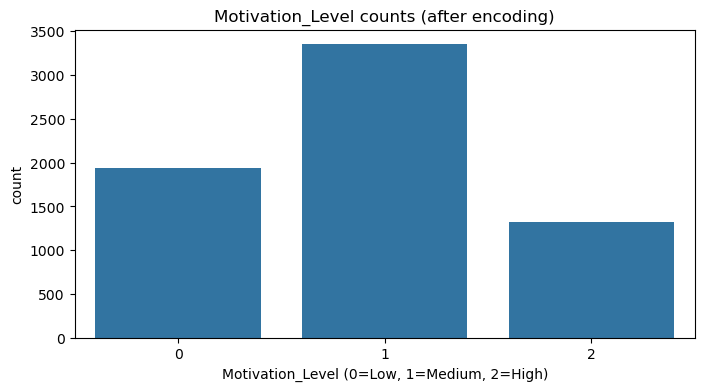

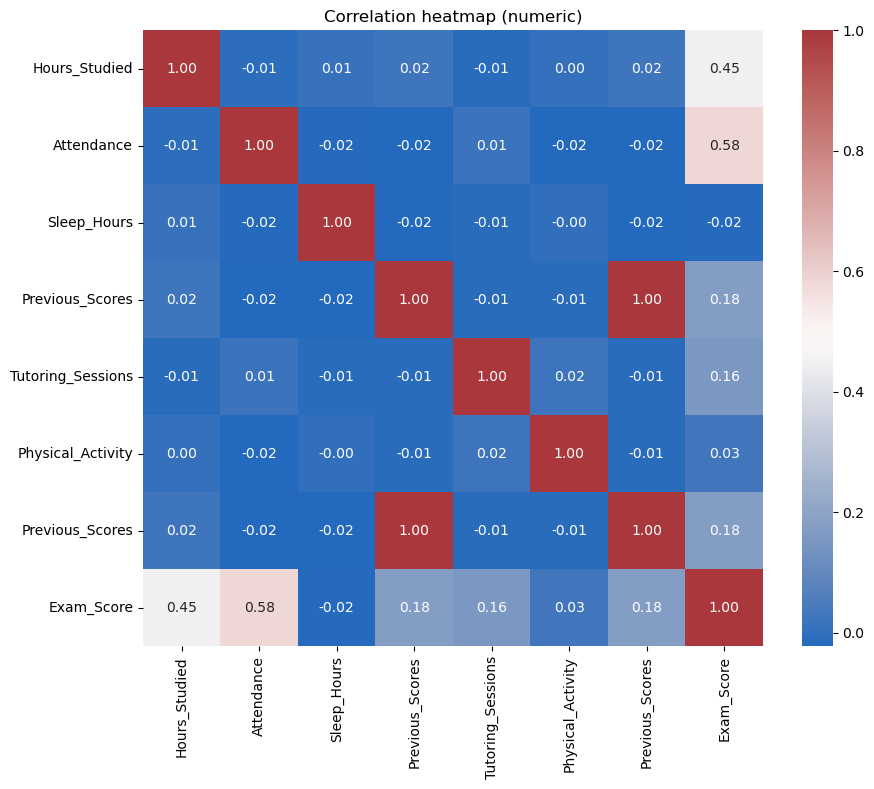

In [19]:
# Cell I —  visuals
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Motivation_Level')
plt.title("Motivation_Level counts (after encoding)")
plt.xlabel("Motivation_Level (0=Low, 1=Medium, 2=High)")
plt.show()


plt.figure(figsize=(10,8))
sns.heatmap(df[[*numeric_cols_present, 'Previous_Scores', 'Exam_Score']].corr(), annot=True, fmt=".2f", cmap='vlag')
plt.title("Correlation heatmap (numeric)")
plt.show()
